<a href="https://colab.research.google.com/github/prithiba-A/CVIP-Internship-Coderscave/blob/main/Coderscave_Phase1_normal_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation for Personalized Marketing**

In [67]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [68]:
# Load your customer data into a pandas DataFrame
# Replace 'your_data.csv' with the actual file path or URL of your dataset
data = pd.read_csv('/content/E-commerce Customer Behavior - Sheet1.csv')
data

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [69]:
# 1. Data Understanding and Exploration
print("Data Exploration:")
print(data.info())
print(data.describe())

Data Exploration:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB
None
       Customer ID         Age  Total Spend  Items Purchased  Average Rating  \
count

In [70]:
# 2. Feature Selection
selected_features = data[['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase', 'Satisfaction Level']]

In [71]:
# 3. Data Preprocessing
# Handle missing values, outliers, encode categorical variables, etc.

# Handling Missing Values
data = data.dropna()  # Drop missing values in the original dataset
selected_features = selected_features.dropna()  # Drop missing values in the selected features

# Encoding Categorical Variables (if any)
# Example: If 'Gender' is a categorical variable
# data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Exclude non-numeric columns before scaling
numeric_columns = selected_features.select_dtypes(include=[np.number]).columns
scaled_data = selected_features[numeric_columns]

# Convert scaled_data to a Pandas DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=numeric_columns)

# Standardize numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)

# Reset the index after dropping missing values
data.reset_index(drop=True, inplace=True)
scaled_data = pd.DataFrame(scaled_data, columns=numeric_columns)

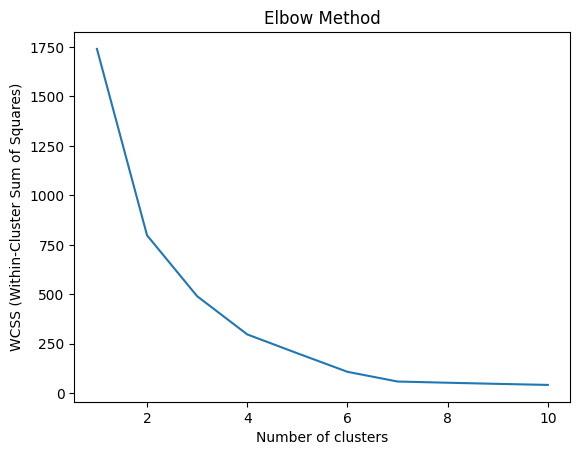

<ipython-input-72-39e7f23e3ee5>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Segment'] = kmeans.fit_predict(scaled_data)


In [72]:
# 4. Customer Segmentation
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
optimal_clusters = 3

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Segment'] = kmeans.fit_predict(scaled_data)

In [73]:
# 5. Interpretation of Segments
segment_summary = data.groupby('Segment').mean()
print("Segment Summary:")
print(segment_summary)

Segment Summary:
         Customer ID        Age  Total Spend  Items Purchased  Average Rating  \
Segment                                                                         
0         274.572650  29.923077  1311.144444        17.615385        4.675214   
1         277.561404  39.403509   474.223684         8.517544        3.326316   
2         275.572650  31.555556   748.432479        11.658120        4.051282   

         Discount Applied  Days Since Last Purchase  
Segment                                              
0                0.504274                 17.940171  
1                0.508772                 31.780702  
2                0.495726                 30.256410  


<ipython-input-73-1cc2d738d5b7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_summary = data.groupby('Segment').mean()


In [75]:
# 6. Profile Building
segment_labels = {
    0: 'High Spending, Young Adults',
    1: 'Middle-aged, Moderate Spending',
    2: 'High Income, Low Spending'
}

data['SegmentLabel'] = data['Segment'].map(segment_labels)

<ipython-input-75-cb4ed316a7c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SegmentLabel'] = data['Segment'].map(segment_labels)


In [76]:
# 7. Targeted Marketing Strategies
# Example strategies (customize based on segment analysis)

# Strategy for High Spending, Young Adults (Segment 0)
high_spending_strategy = "Target this segment with exclusive discounts on trendy products and promote through social media platforms."

# Strategy for Middle-aged, Moderate Spending (Segment 1)
middle_aged_strategy = "Implement loyalty programs and personalized recommendations to encourage repeat purchases among this segment."

# Strategy for High Income, Low Spending (Segment 2)
high_income_low_spending_strategy = "Focus on premium product offerings and provide incentives to increase spending for this high-income segment."

# Print strategies for each segment
for segment, label in segment_labels.items():
    print(f"\nStrategy for {label} (Segment {segment}):")
    if segment == 0:
        print(high_spending_strategy)
    elif segment == 1:
        print(middle_aged_strategy)
    elif segment == 2:
        print(high_income_low_spending_strategy)
    else:
        print("Customize strategy for this segment.")


Strategy for High Spending, Young Adults (Segment 0):
Target this segment with exclusive discounts on trendy products and promote through social media platforms.

Strategy for Middle-aged, Moderate Spending (Segment 1):
Implement loyalty programs and personalized recommendations to encourage repeat purchases among this segment.

Strategy for High Income, Low Spending (Segment 2):
Focus on premium product offerings and provide incentives to increase spending for this high-income segment.


<ipython-input-77-99759a710e26>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PCA1'] = pca_result[:, 0]
<ipython-input-77-99759a710e26>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PCA2'] = pca_result[:, 1]


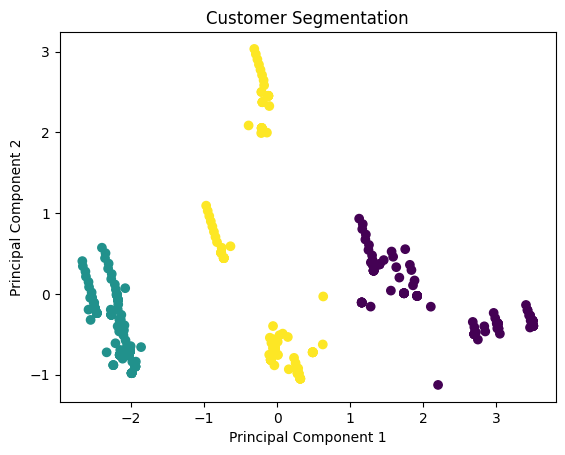

In [77]:
# 8. Visualize the Clusters
# Use Principal Component Analysis (PCA) for visualization (example for two features)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

plt.scatter(data['PCA1'], data['PCA2'], c=data['Segment'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

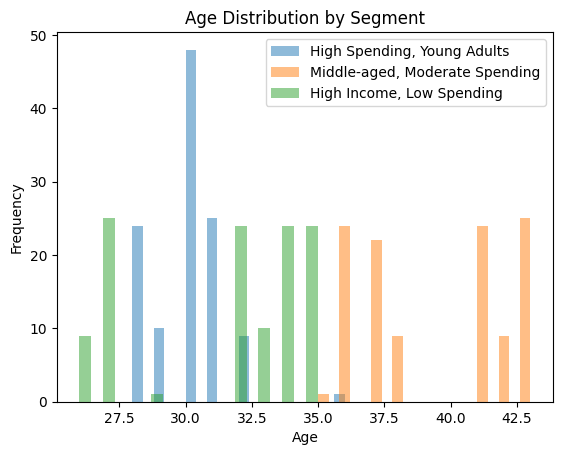

In [78]:
# 9. Further Data Interpretation and Profiling
# Explore additional insights based on segment characteristics
# For example, analyze the distribution of each feature within each segment

# Example: Distribution of 'Age' within each segment
for segment, label in segment_labels.items():
    segment_data = data[data['Segment'] == segment]
    plt.hist(segment_data['Age'], bins=20, label=label, alpha=0.5)

plt.title('Age Distribution by Segment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

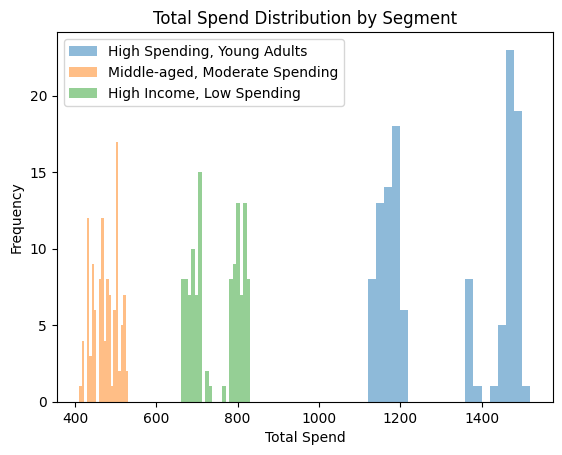

In [79]:
# 9. Further Data Interpretation and Profiling
# Explore additional insights based on segment characteristics
# For example, analyze the distribution of each feature within each segment

# Example: Distribution of 'Age' within each segment
for segment, label in segment_labels.items():
    segment_data = data[data['Segment'] == segment]
    plt.hist(segment_data['Total Spend'], bins=20, label=label, alpha=0.5)

plt.title('Total Spend Distribution by Segment')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.legend()
plt.show()

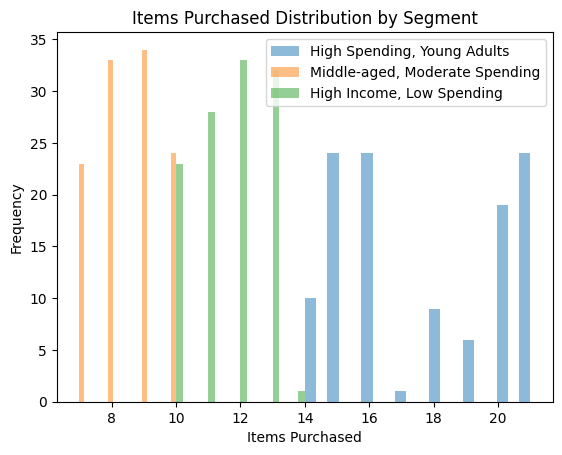

In [80]:
# 9. Further Data Interpretation and Profiling
# Explore additional insights based on segment characteristics
# For example, analyze the distribution of each feature within each segment

# Example: Distribution of 'Age' within each segment
for segment, label in segment_labels.items():
    segment_data = data[data['Segment'] == segment]
    plt.hist(segment_data['Items Purchased'], bins=20, label=label, alpha=0.5)

plt.title('Items Purchased Distribution by Segment')
plt.xlabel('Items Purchased')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [82]:
data.to_csv('segmented_data.csv', index=False)